In [180]:
#Data Preparation
#We will now import some required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import auc, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

#Loading the dataset
dataset = pd.read_csv('bank-additional-full.csv',delimiter=";")
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [181]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [182]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [183]:
#Initial data prep
#check for null values
#dataset.isnull().values.any()
#remove rows with >= 4 unkown values
#dataset = dataset.replace(to_replace='unknown', value=np.nan).dropna(thresh=17)
#dataset = dataset.replace(to_replace='unknown', value=np.nan).dropna()
#dataset = dataset.replace(to_replace=np.nan, value='unknown')
#dataset.info()
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [184]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['job','marital','education','default','housing','loan','contact','poutcome','month','day_of_week'])
dataset = encoder.fit_transform(dataset)

In [185]:
dataset.head()

,age,job_0,job_1,job_2,job_3,job_4,marital_0,marital_1,marital_2,education_0,...,previous,poutcome_0,poutcome_1,poutcome_2,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,0,0,0,1,0,0,1,0,...,0,0,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,0,0,0,1,0,0,0,1,0,...,0,0,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,0,0,0,1,0,0,0,1,0,...,0,0,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,0,0,1,1,0,0,1,0,...,0,0,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,0,0,0,1,0,0,0,1,0,...,0,0,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [186]:
# splitting data
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [187]:
#Encode catagorical features in column 1-9 and 14
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelencoder_X = LabelEncoder()
# for i in range(1,10):
#      X[:,i] = labelencoder_X.fit_transform(X[:,i])
# X[:,14] = labelencoder_X.fit_transform(X[:,14])

# onehotencoder = OneHotEncoder(categorical_features=[1,2,3,4,5,6,7,8,9,14])
# X = onehotencoder.fit_transform(X).toarray()

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [188]:
X.shape

(41188, 45)

In [189]:
#Backward Elimination reduced score from 91.85 to 89.16
#Backward Elimination
#import statsmodels.formula.api as sm
# adding column of ones for y-intercept *scikit does this for you, prefer to keep col in front
# append X onto array of ones
#X = np.append(arr=np.ones((41188,1)).astype(int), values=X, axis=1)
#note automatic backwared elimination
#def backwardElimination(x, sl):
#    numVars= len(x[0])
#    for i in range(0, numVars):
#        obj_OLS= sm.OLS(y, x).fit()
#        maxVar= max(obj_OLS.pvalues).astype(float)
#        if maxVar> sl:
#            for j in range(0, numVars-i):
#                if (obj_OLS.pvalues[j].astype(float) == maxVar):
#                    x = np.delete(x, j, 1)
#    obj_OLS.summary()
#    return x
#SL = 0.05
#X_sig=X[:,[0,63]]
#X_Modeled = backwardElimination(X_sig,SL)

In [190]:
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

#Normalizing the features
from sklearn.preprocessing import StandardScaler
#instantiate the standard scalar (make a StandardScaler object)
sc_X = StandardScaler()
# pass to object X_train, compute mean and std for each value in data set
# fit yourself to this, transform and save to X_train, fit computes mean/std
X_train = sc_X.fit_transform(X_train)
#don't fit on test set, only have one sample at a time, don't have all instances that it
#will see over lifetime of model
X_test = sc_X.transform(X_test)
#print(X_test)

In [191]:
#Applying PCA
#First we want to including all principle components by specifying None
# from sklearn.decomposition import PCA
#start with None, then eval
# pcaObj = PCA(n_components=2)
# X_train = pcaObj.fit_transform(X_train)
# X_test = pcaObj.transform(X_test)
#show components and what is most important, then decid on n_components
# components_variance= pcaObj.explained_variance_ratio_
# print(components_variance)

In [192]:
from sklearn.tree import DecisionTreeClassifier
#improved acc from 89 to 90 adding max_depth
classifierObj = DecisionTreeClassifier(criterion='entropy', max_depth=5)
classifierObj.fit(X_train,y_train)

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=X_train, y=y_train, cv=10)
print(modelAccuracies.mean())
print(modelAccuracies.std())

0.9131109657436545
0.002775834816710175


In [193]:
#Making predictions on the Test Set
y_pred= classifierObj.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7057  262]
 [ 405  514]]


In [194]:
score = classifierObj.score(X_test, y_test)
print(score)

0.9190337460548677


In [195]:
y_pred = classifierObj.predict(X_test)
print('The accuracy of prediction is:', accuracy_score(y_test, y_pred))
#print('The roc_auc_score of prediction is:', roc_auc_score(y_test, y_pred))
print('The null acccuracy is:', max(y_test.mean(), 1 - y_test.mean()))

The accuracy of prediction is: 0.9190337460548677
The null acccuracy is: 0.888443797038116


In [196]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9190337460548677


Index(['age', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'marital_0',
       'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2',
       'education_3', 'default_0', 'default_1', 'default_2', 'housing_0',
       'housing_1', 'housing_2', 'loan_0', 'loan_1', 'loan_2', 'contact_0',
       'contact_1', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4',
       'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome_0', 'poutcome_1',
       'poutcome_2', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')


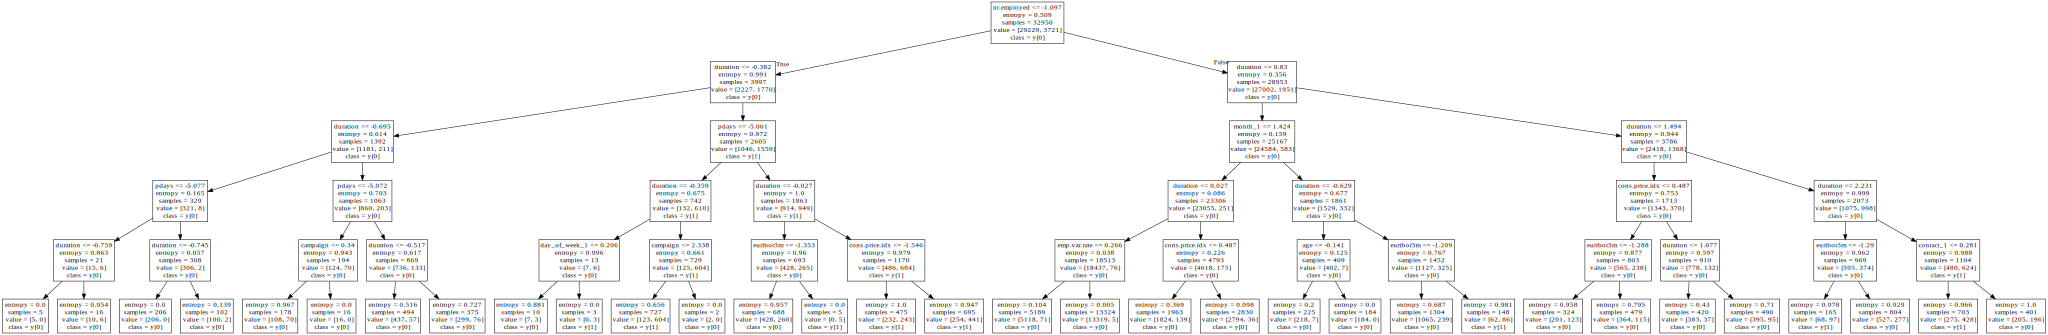

In [197]:
from graphviz import Source
from sklearn import tree
class_names = dataset.columns[:-1]
print(class_names)
feature_names = dataset.columns[:-1]
Source( tree.export_graphviz(classifierObj, out_file=None, feature_names=class_names, class_names=True))
graph = Source( tree.export_graphviz(classifierObj, out_file=None))
graph.format = 'png'
graph.render('dtree_render',view=True)
from IPython.display import SVG
graph = Source( tree.export_graphviz(classifierObj, out_file=None, feature_names=class_names, class_names=True))
SVG(graph.pipe(format='svg'))

### Summary
        Features     | Max_tree Depth | Score | Notes:
            all      | 3              | 90.39 | hot encoding, all rows
            all      | 5              | 91.85 | hot encoding, all rows
            all      | 10             | 90.38 | hot encoding, all rows
            all      | 5              | 91.69 | hot encoding, delete row unknown in >= 4 col
    PCA dim reduction| 5              | 91.69 | hot encoding, delete row unknown in >= 4 col
    PCA dim reduction| 5              | 90.37 | no hot encoding, delete row unknown in >= 4 col
            all      | 5              | 90.63 | binary encoding, delet all rows with unknown
            all      | 5              | 91.90 | binary encoding, all rows  